# In-depth analysis
# Case of Study 2: Miami

The following analysis explores the **customer preferences** and the **restaurant situation in a specific geographical location**. 

The **Section 1** displays lower triangular correlation matrix heatmaps of shopping behavioral and demographic variables, as well as the relationship between the different shopping variables. 
- Pearson correlation was used to compare the shopping variables between them because of their binary nature. Since the demographic variables are categorical, we proceed to use two alternative methodologies:
    - One-hot encoding the demographic variables before to calculate the Pearson correlation. That was applied to get the lower triangular correlation heatmaps arrays.
    - Cramer's V, a measure of association (chi-squared statistic) between two categorical variables.

The **Section 2**  examines the mobility trends in the selected location. Some of the metrics included are the average distance that a typical member of the community moves on a regular day, mobility around different venues and route requests to drive, walk and transit into the city. In this section we apply additive decomposition of timeseries in some specific examples, to remove seasonality and noise from the signal and preserve only the trend, which is the significant signal component for the current purpose.

The **Section 3** investigates the restaurant scenario in the city: rankings, prices, popularity, locations and operations details (type of transactions allowed).

Finally, using the consumer preferences, mobility trends and restaurants features, we extract recommendations by zipcode.

In this example, we scrutinize the city of Miami. Why?

Miami lies in stark contrast to San Francisco regarding COVID response. While San Francisco has maintained restrictions throughout the pandemic, Miami has had much looser restrictions. Ever since October of 2020, Miami restaurants have been allowed to operate at 100% capacity given that tables are spaced 6 feet apart. Before this point they operated at 50% capacity.

A factor in Miami's COVID response has been Governor Ron DeSantis. DeSantis had lifted all restrictions on dining in september of 2020 despite pushback from places like Miami. DeSantis is one of the most anti-restriction governors in the country. In contrast, Governor Gavin Newsom has been one of the most active governors in terms of placing restrictions.

Miami is also a different city than SF. The biggest industry driving GDP growth in Miami is Tourism and Hospitality. As covered earlier these industries have been hit the hardest by the pandemic. The biggest industry driving GDP growth in San Francisco continues to be the tech industry, which has largely gone remote. In theory, this means that SF can afford a lockdown more easily than Miami.

## Section 1: Consumer preferences

This section uses the Household Pulse Survey 2020 to identify consumer preferences and analyze consumer behavioral variables in a sample population of the metro-area of San Francisco Bay Area. In the survey, the customer questions are collected bi-weekly from August 19th, 2020 to December 7th, 2020 and they are related to the behavioral patterns of the participants in the last 7 days. The variables are the following:
- Purchase methods
    - Do more online purchases
    - Do more cubside pick-up purchases
    - Do more in-store purchases
- Payment methods
    - Use more contactless payment methods (apps, credit card)
    - Use more cash
- Restaurants
    - Resumed eating at restaurants
    - Avoided eating at restaurants

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import indepth_functions
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/interim/census/household_shopping_concat.csv')

In [4]:
df_summary = pd.read_csv('../data/processed/shopping_statistics_msa.csv')

In [5]:
df['GENERATION'] = df.TBIRTH_YEAR.apply(indepth_functions.generation_)

In [6]:
df_summary

,EST_MSA,In-store,Online,Online + Pickup,Pickup,CHNGHOW4,CHNGHOW5,CHNGHOW6,CHNGHOW7,MSA_NAME
0,12060.0,8.59,47.30,38.47,5.64,92.73,7.27,86.59,13.41,Atlanta-Sandy Springs-Alpharetta
1,14460.0,6.66,55.97,33.67,3.70,94.55,5.45,87.68,12.32,Boston-Cambridge-Newton
2,16980.0,7.62,48.39,37.91,6.08,94.34,5.66,89.08,10.92,Chicago-Naperville-Elgin
3,19100.0,8.53,41.07,42.84,7.56,92.32,7.68,84.79,15.21,Dallas-Fort Worth-Arlington
4,19820.0,9.66,46.58,36.89,6.87,92.00,8.00,85.40,14.60,Detroit-Warren-Dearborn
5,26420.0,9.55,40.29,41.74,8.43,92.64,7.36,84.75,15.25,Houston-The Woodlands-Sugar Land
6,31080.0,6.99,52.22,36.14,4.64,93.80,6.20,90.70,9.30,Los Angeles-Long Beach-Anaheim
7,33100.0,9.93,54.18,30.99,4.90,92.35,7.65,88.63,11.37,Miami-Fort Lauderdale-Pompano Beach
8,35620.0,8.94,59.96,27.19,3.91,93.29,6.71,86.28,13.72,New York-Newark-Jersey City
9,37980.0,8.29,53.34,33.55,4.83,92.59,7.41,87.97,12.03,Philadelphia-Camden-Wilmington


In [7]:
#metro-area code
EST_MSA = 33100
name_location = 'Miami-Fort Lauderdale-Pompano Beach'

In [8]:
indepth_functions.summary_shopping_behavior(df_summary, EST_MSA)

PURCHASE METHODS --------------------------------------------------------
Pct surveyed people doing more online-purchases: 7    54.18
Name: Online, dtype: float64

Pct surveyed people doing more pickup-purchases: 7    4.9
Name: Pickup, dtype: float64

Pct surveyed people doing more online + pickup purchases: 7    30.99
Name: Online + Pickup, dtype: float64

Pct surveyed people doing more in-store purchases: 7    9.93
Name: In-store, dtype: float64

PAYMENT METHODS ---------------------------------------------------------
Pct surveyed people using contactless payment methods: 7    92.35
Name: CHNGHOW4, dtype: float64

Pct surveyed people using more cash: 7    7.65
Name: CHNGHOW5, dtype: float64

RESTAURANTS -------------------------------------------------------------
Pct surveyed people who resumed eating at restaurants: 7    11.37
Name: CHNGHOW7, dtype: float64

Pct surveyed people who avoided eating at restaurants: 7    88.63
Name: CHNGHOW6, dtype: float64



### 1.1 Correlation between shopping behavioral variables

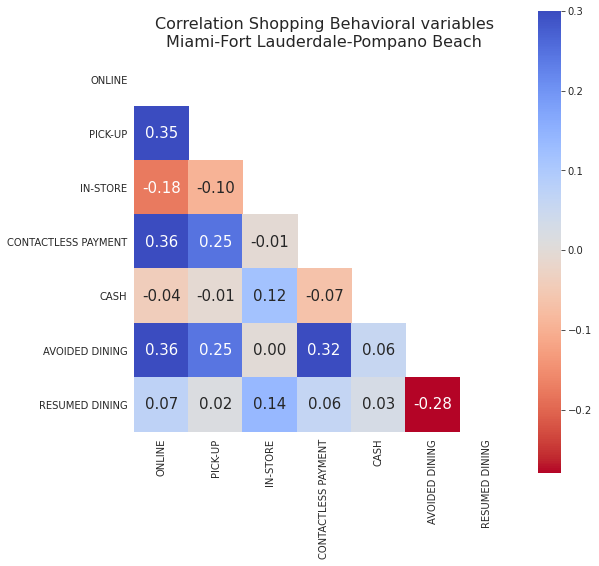

In [9]:
indepth_functions.shopping_behaviors_correlation(df, EST_MSA, name_location)

- Online purchases are related to pick-up, contactless payment methods and avoided eating at restaurants.
- In-store purchases are related to increment in the use of cash and resumed eating at restaurants.

Defining **protective** behavioral change as any conforms to pandemic-avoidance behaviors (e.g., increasing online shopping, avoiding eating at restaurants), whereas a **relaxing** behavioral change as any weaker adherence to pandemic-avoidance behaviors (e.g., increasing in-store shopping, resuming eating at restaurants), it's clear than protective behavioral changes are strongly positive correlated between themselves and negative correlated with relaxing behavioral changes. The opposite is true as well.

#### Avoid eating at restaurants

Variables more correlated to Avoid eating at restaurants: 
EEDUC      0.087699
MS         0.060135
EGENDER    0.052778
Name: CHNGHOW6, dtype: float64


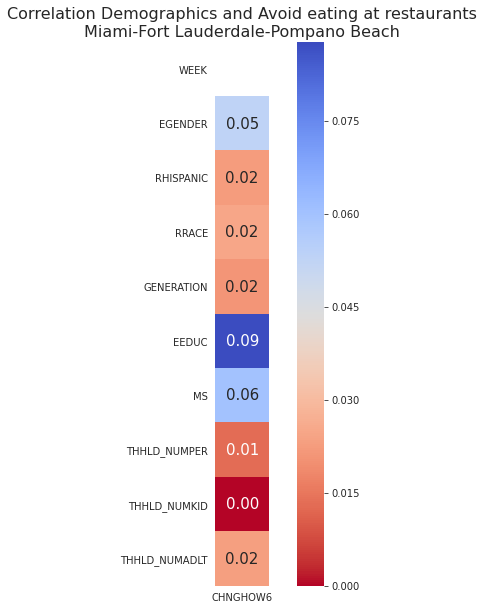

In [10]:
shopping_variable = 'CHNGHOW6'
name_variable = 'Avoid eating at restaurants'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

Avoid eating at restaurants is strongly related to the demographic categorical variables `EGENDER` (Gender), `EDDUC` (Level of Education) and `MS` (Marital Status). Let's dive into those variables:

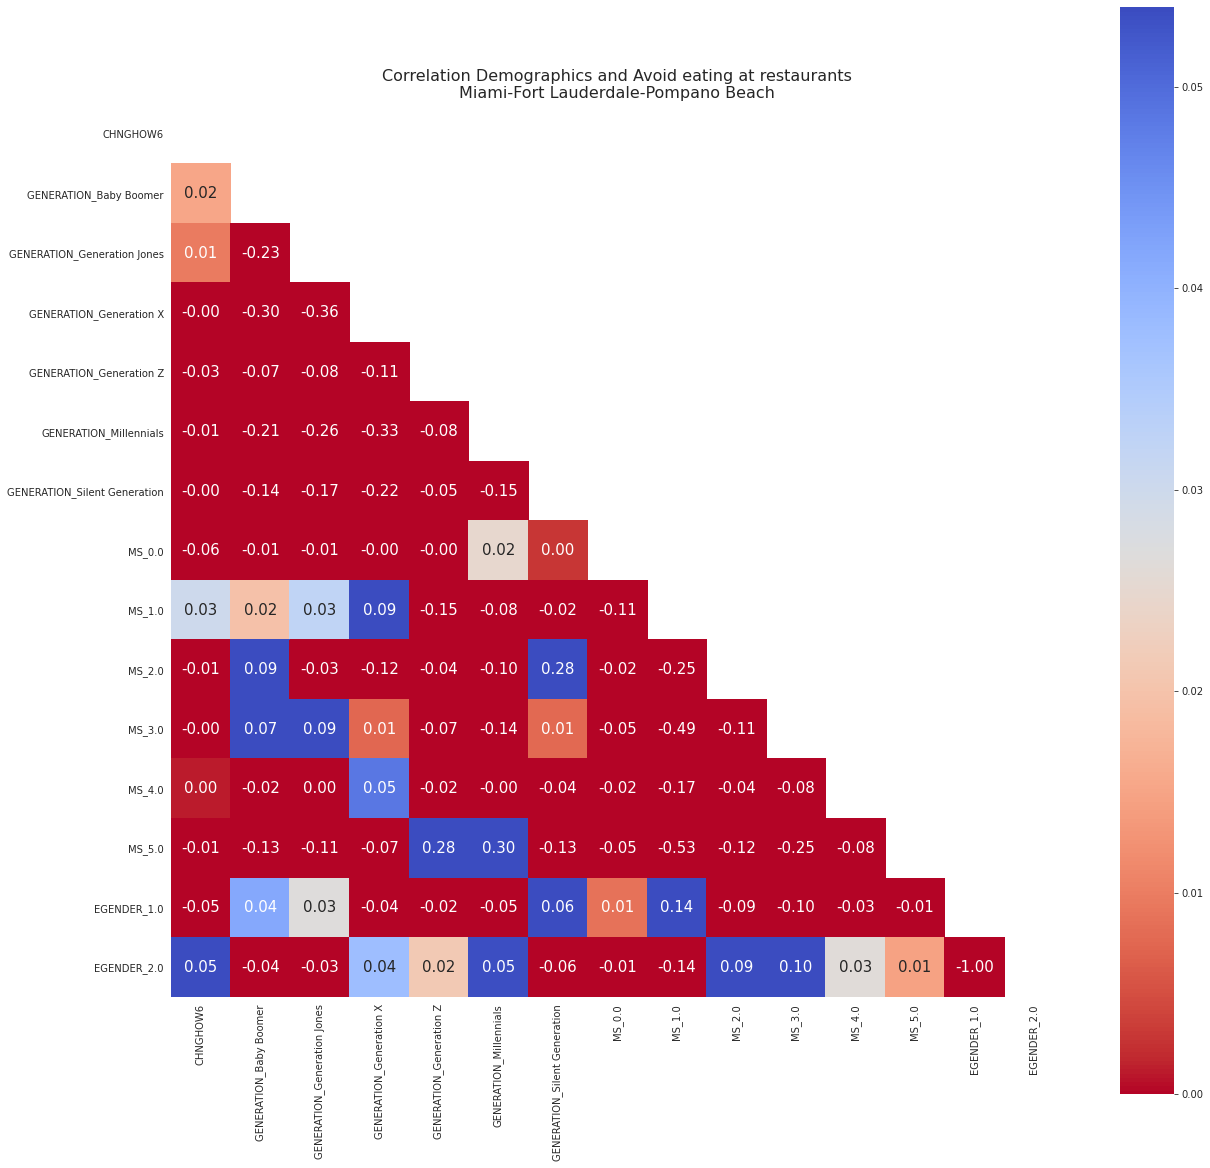

In [11]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION','MS', 'EGENDER'])

Avoid eating at restaurants correlated to `EGENDER_2.0` (Female), and higher educational attainment (Graduate Degrees). 

Variables more correlated to Resumed eating at restaurants: 
RRACE         0.072686
EEDUC         0.061932
GENERATION    0.054060
Name: CHNGHOW7, dtype: float64


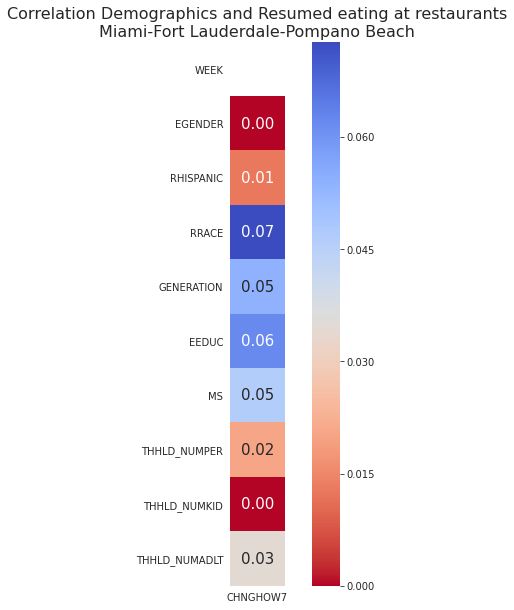

In [12]:
shopping_variable = 'CHNGHOW7'
name_variable = 'Resumed eating at restaurants'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

The variables most correlated to resumed eating at restaurants are `RRACE` (Race), `EEDUC` (Educational attainment), `GENERATION` (Generation), and `MS`(Marital Status). Let's take a dive!

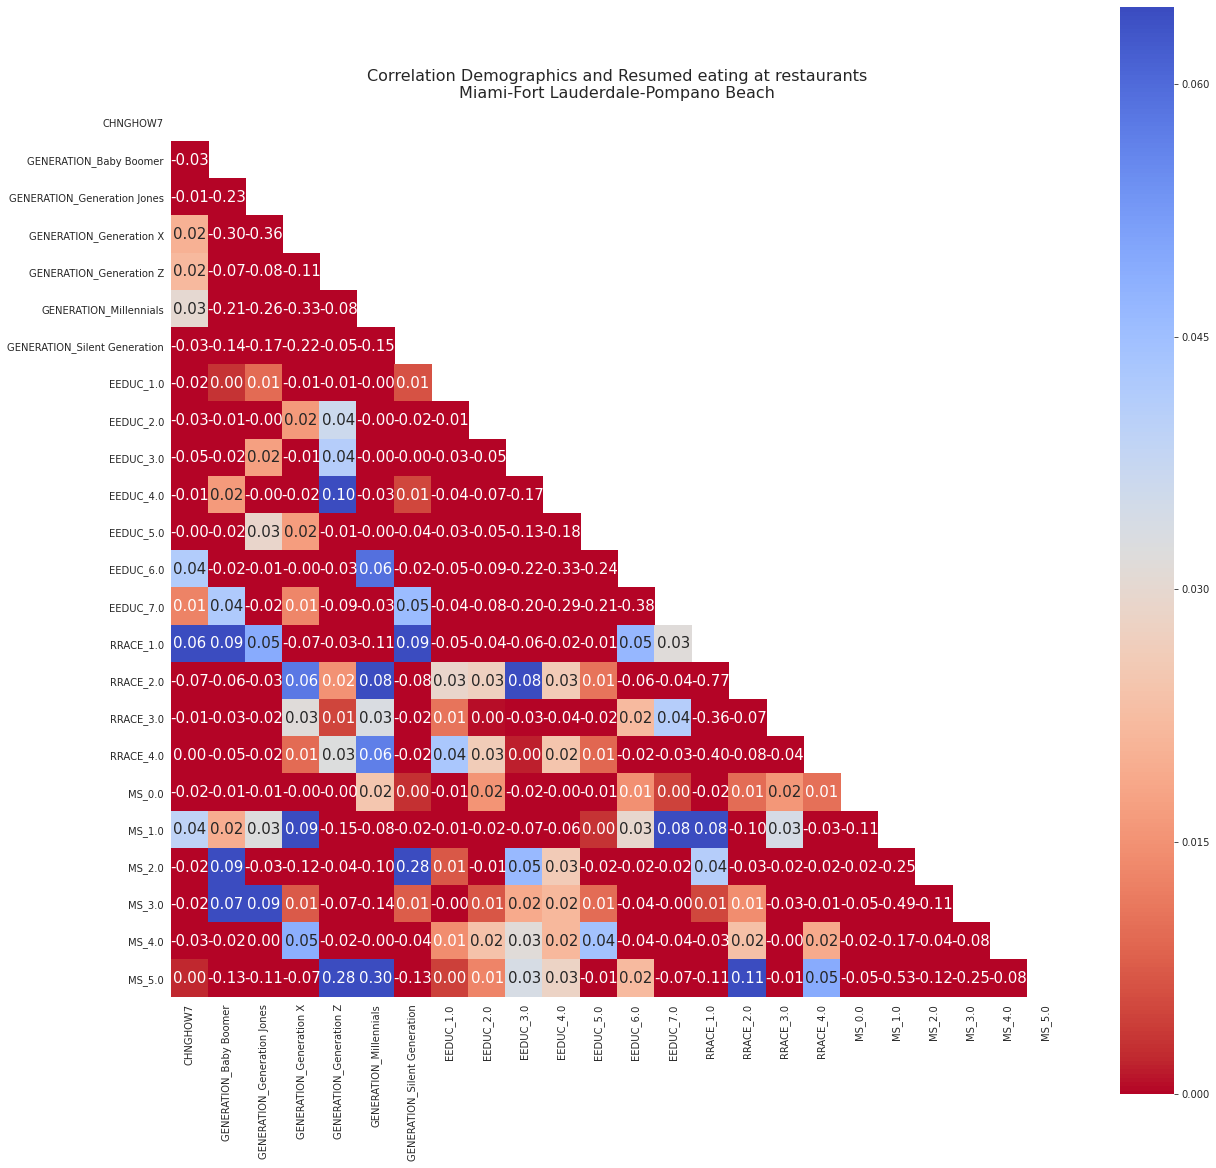

In [13]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION', 'EEDUC', 'RRACE', 'MS'])

- `RRACE_1.0` (White People) are more likely to resume eating at restaurants. 

Variables more correlated to Contactless payment methods: 
EEDUC            0.050279
RRACE            0.049026
THHLD_NUMADLT    0.033330
Name: CHNGHOW5, dtype: float64


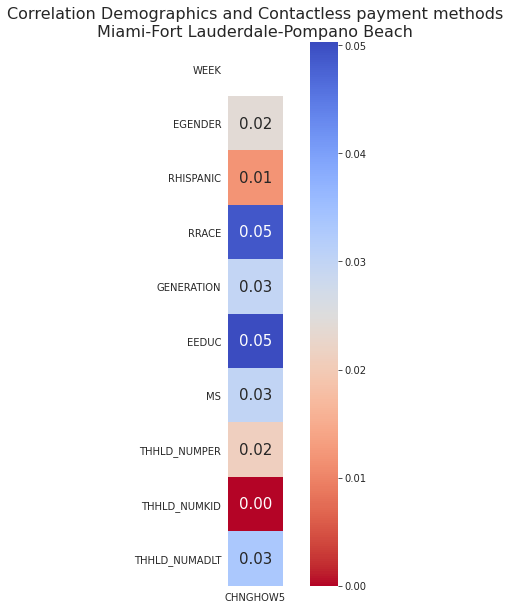

In [14]:
shopping_variable = 'CHNGHOW5'
name_variable = 'Contactless payment methods'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

- `RRACE` and `EEDUC` seem to be more correlated with contactless payments. Let us take a closer look:

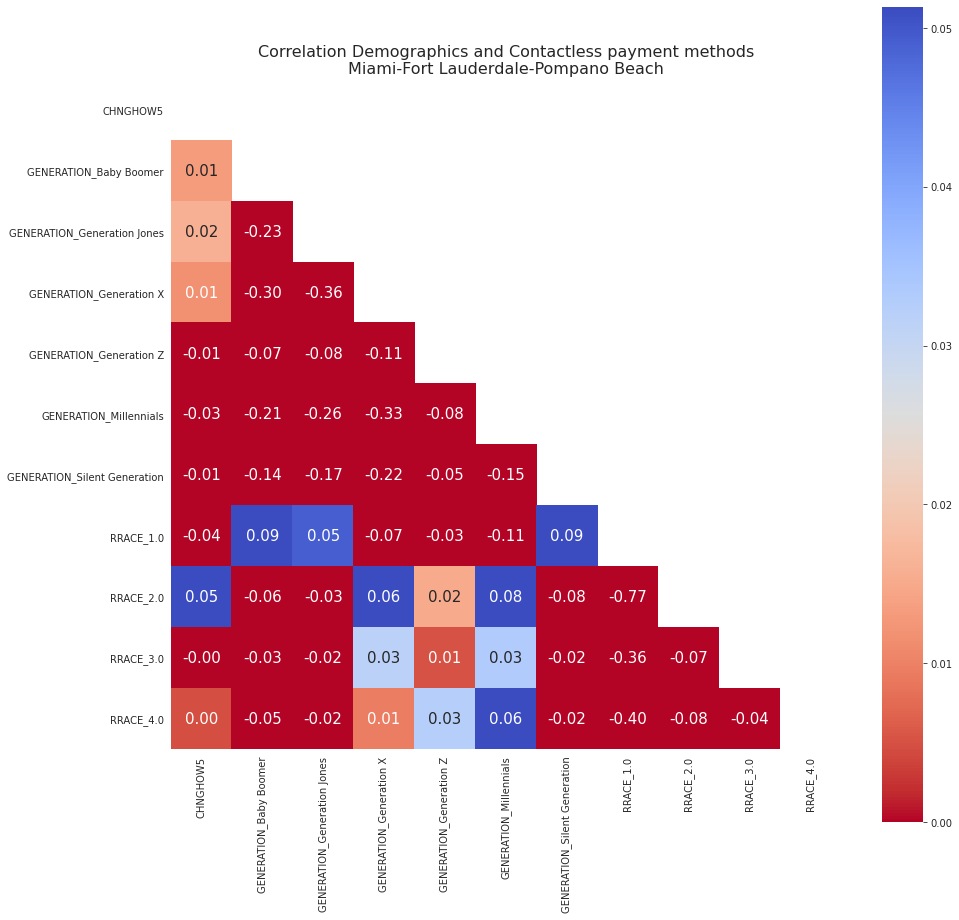

In [15]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION', 'RRACE'])

- `RRACE_2.0` (African Americans) are more likely to use contactless payments

Let us also see the correlation between contacless payments and `GENERATION` & `THHLD_NUMADLT` (Number of adults in households) since they made some noise before. 

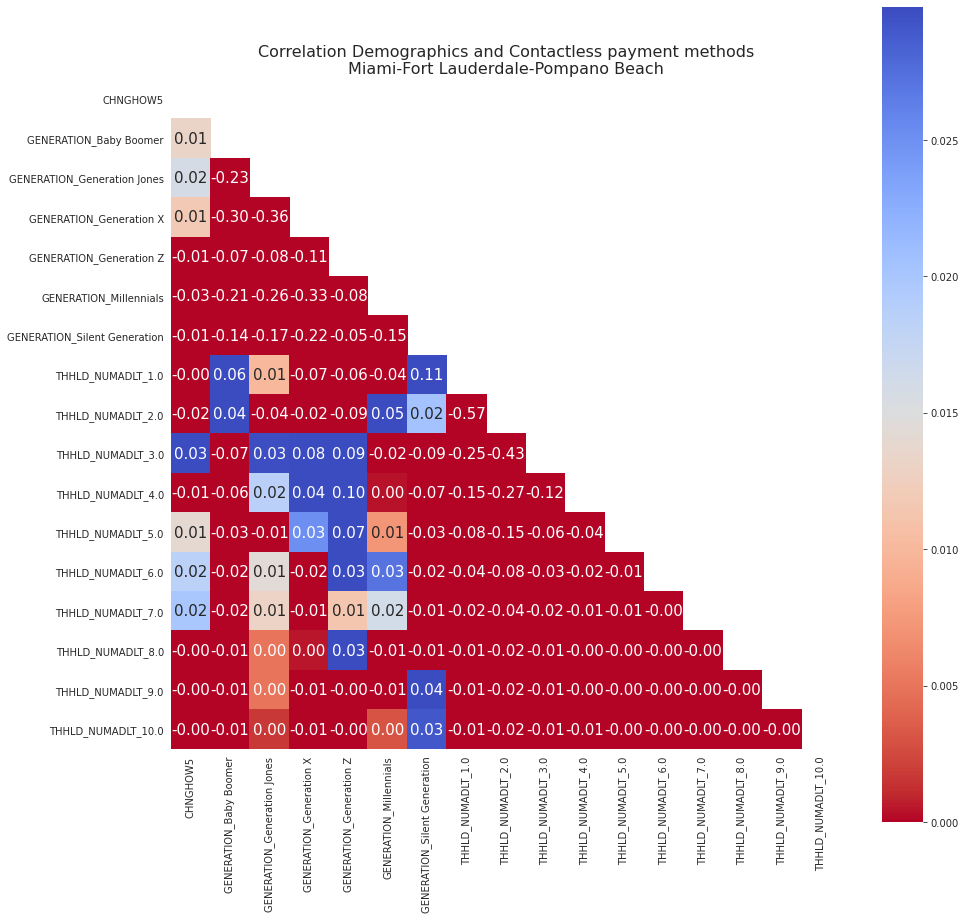

In [16]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION', 'THHLD_NUMADLT'])

- `THHLD_NUMADLT_3.0` (3 Adults in the households) seems to have the highest correlation with contactless payments. 
Let us take a look at In-store Purchases!

Variables more correlated to In-store Purchases: 
EEDUC         0.064229
RRACE         0.052563
GENERATION    0.033603
Name: CHNGHOW3, dtype: float64


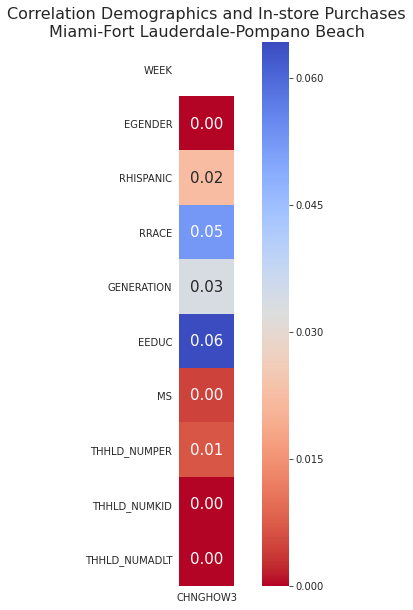

In [17]:
shopping_variable = 'CHNGHOW3'
name_variable = 'In-store Purchases'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

`RRACE` and `EEDUC` have the highest correlations. Let us take a look further!

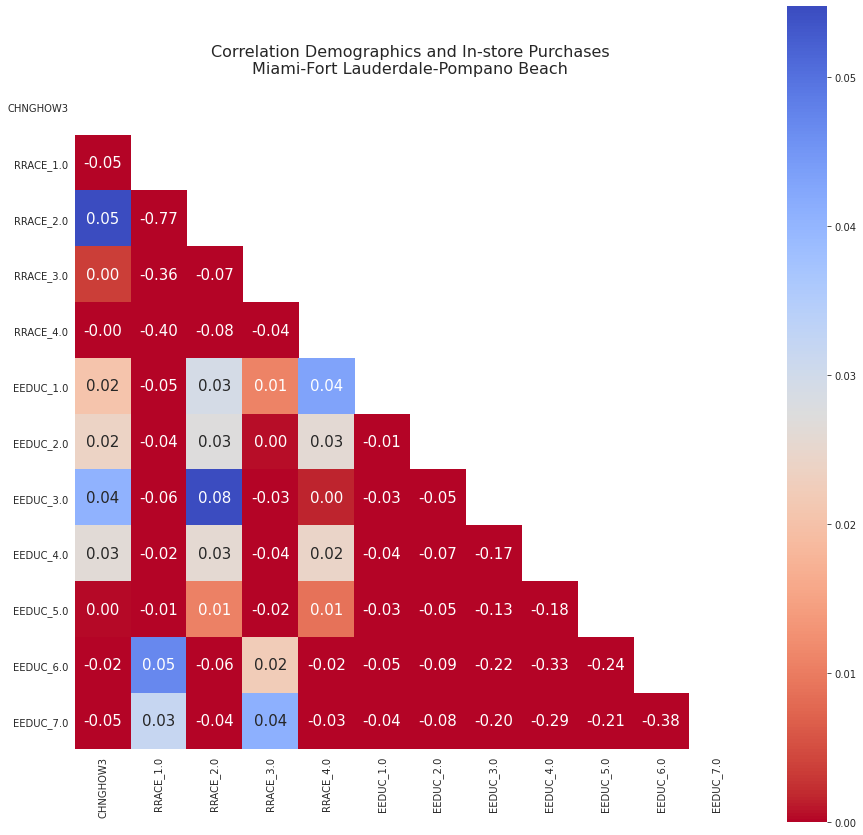

In [18]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['RRACE', 'EEDUC'])

- `RRACE_2.0` (African Americans) are more likely to complete in-store purchases. `EEDUC_3.0` (High School or equivelent) is less strongly correlated.

Let us dive into Online Purchases!

Variables more correlated to Online Purchases: 
EEDUC            0.186858
MS               0.096395
THHLD_NUMADLT    0.076833
Name: CHNGHOW1, dtype: float64


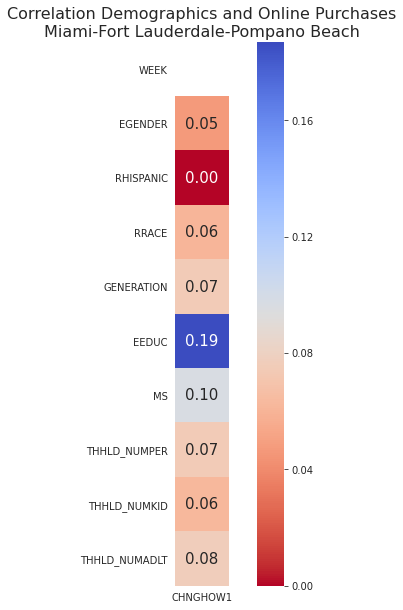

In [19]:
shopping_variable = 'CHNGHOW1'
name_variable = 'Online Purchases'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

`EEDUC`, `MS`, and `THHLD_NUMADLT` are the most correlated. Let us take a closer look at these variables, especially the `EEDUC` variable.

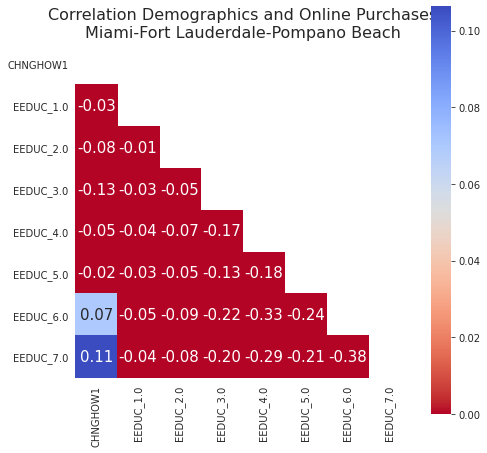

In [20]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['EEDUC'])

- Higher `EEDUC`(Higher educational attainments), `THHLD_NUMADLT_2.0` (2 adults in the households), and `MS_1.0` (Married) are the most strongly correlated with shopping online. Higher educational attainments have by far the strongest correlations in the group.

## Section 2: Mobility Trends

In [21]:
df_descartes_counties = pd.read_csv('../data/interim/mobility/m50_max_counties.csv')
df_descartes_counties_percent = pd.read_csv('../data/interim/mobility/m50_percent_counties.csv')

In [22]:
df_descartes_counties.head()

,COUNTY,NAME,country_code,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30
0,1001,Autauga County,US,49.0,100.0,95.0,95.0,100.0,116.0,79.0,...,80.0,79.0,91.0,47.0,39.0,66.0,76.0,76.0,65.0,91.0
1,1003,Baldwin County,US,81.0,100.0,95.0,90.0,102.0,114.0,95.0,...,86.0,86.0,99.0,75.0,69.0,80.0,82.0,64.0,67.0,93.0
2,1005,Barbour County,US,90.0,107.0,100.0,70.0,88.0,118.0,141.0,...,92.0,99.0,131.0,78.0,71.0,88.0,95.0,91.0,90.0,141.0
3,1007,Bibb County,US,53.0,95.0,100.0,94.0,111.0,133.0,112.0,...,66.0,81.0,85.0,42.0,35.0,64.0,71.0,62.0,63.0,86.0
4,1009,Blount County,US,68.0,96.0,100.0,99.0,101.0,114.0,93.0,...,80.0,85.0,85.0,53.0,50.0,77.0,78.0,79.0,77.0,84.0


In [23]:
location = 'Miami-Dade County'

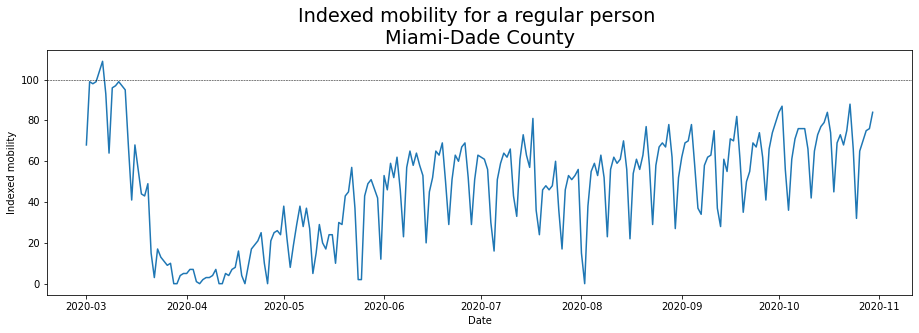

In [24]:
indepth_functions.indexed_mobility_average_person(df_descartes_counties, location)

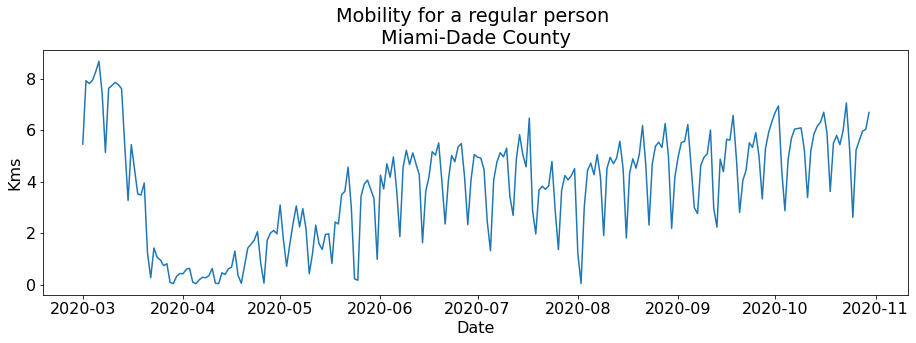

In [25]:
indepth_functions.mobility_average_person(df_descartes_counties_percent, location)

In [26]:
df_apple = pd.read_csv('../data/interim/mobility/apple_mobility_cities.csv', index_col=0)
location = 'Miami'

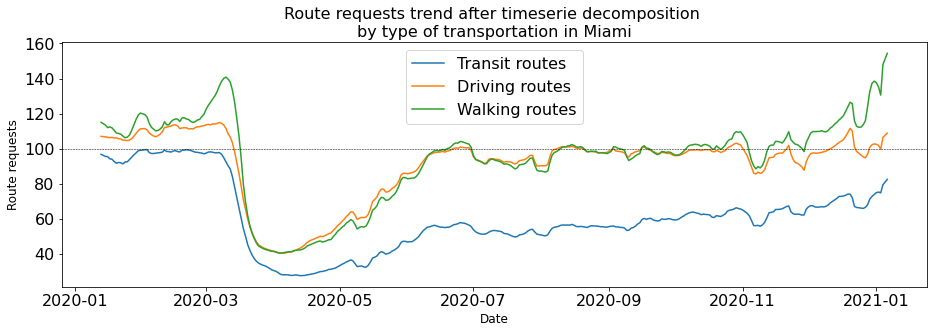

In [27]:
indepth_functions.compile_decomposition(df_apple, 'trend', location)

In [28]:
df_foursquare_dma = pd.read_csv('../data/interim/mobility/foursquare_dma.csv', index_col=0)
df_google = pd.read_csv('../data/interim/mobility/google_counties.csv', index_col=0)

In [29]:
df_google.head()

,NAME,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,...,2020-10-25,2020-10-26,2020-10-27,2020-08-22,2020-08-23,2020-08-29,2020-08-30,2020-09-05,2020-09-06,category
COUNTY,,,,,,,,,,,,,,,,,,,,,
1001,Autauga County,NaN,NaN,5.0,0.0,0.0,2.0,0.0,NaN,NaN,...,2.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,residential
1003,Baldwin County,-2.0,2.0,1.0,0.0,-1.0,3.0,-1.0,-2.0,-2.0,...,0.0,1.0,2.0,1.0,4.0,3.0,3.0,0.0,0.0,residential
1005,Barbour County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,residential
1007,Bibb County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,residential
1009,Blount County,NaN,NaN,4.0,2.0,0.0,3.0,1.0,NaN,NaN,...,2.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,residential


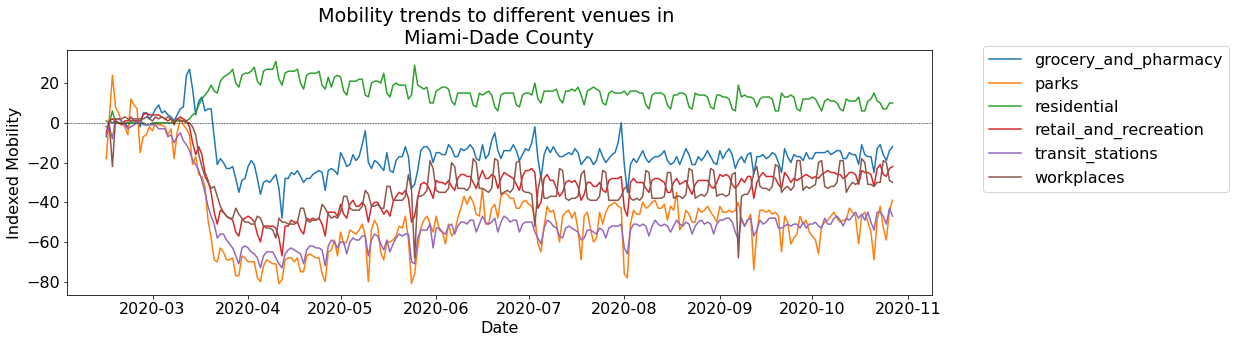

In [30]:
location = 'Miami-Dade County'
indepth_functions.mobility_venues_google(df_google, location)

- In the descartes charts we see that mobility for the average person plummeted during the beginning of the lockdowns. At the beginnning the average person travelled 8km but this went down to around 1km shortly after the first shelter in place orders in March. The highest average mobility after the beginning of the COVID crisis is seen in October 2020 where mobility reached almost 7km or about 80% of baseline. 
- The different type of route requests seen in apple mobility highlights some interesting things. As expected, public transportation requests went down severly during the crisis and always have stayed well below baseline. Walking and driving also decreased but go back up to baseline in July 2020. Driving reamins at baseline for the rest of the pandemic but walking actually increases above baseline towards the end of 2020, even beating out the pre covid walking peak 
- Transit stations, parks, retail & recreation, and workplaces have been the most severely affected venues according to google mobility data. Grocery stores and pharmacies have had less disruption, possibly due to their neccessity. Residential venues have climbed in traffic but that is to be expected with the shelter in place measures.

## Section 3: Restaurants

The following analysis includes 50 businesses/every zip code of San Francisco county. The information of the restaurants was extracted using FUSION API Yelp, which allows a maximum of 50 results for endpoint using the zip codes as keywords and words as Restaurant.

In [31]:
df_restaurants = pd.read_csv('../data/interim/restaurants/yelp_miami.csv')

In [32]:
df_restaurants.head()

,ids,names,rating,review_count,price,transactions,is_closed,type_food,type_food_alias,latitude,longitude,country,state,city,zip_code
0,bspGO743LzemMRSfpbrh8A,PERL by Chef IP,5.0,6,NaN,NaN,False,"Seafood, Mediterranean, Cocktail Bars","seafood, mediterranean, cocktailbars",25.947124,-80.152363,US,FL,Miami,33180.0
1,CMPipZElCaiY7iwkIGmeSA,Etzel Itzik Deli,4.5,193,$$,['delivery'],False,"Delis, Middle Eastern","delis, mideastern",25.949150,-80.148460,US,FL,Miami,33180.0
2,uYyMp91kDtm-yaHQptkByA,Dixie BBQ,3.5,33,$,"['delivery', 'pickup']",False,"Barbeque, Burgers, Kosher","bbq, burgers, kosher",25.949111,-80.149078,US,FL,Miami,33180.0
3,62zeRayPOD9QLJrWhyF5_g,Pita Plus of Aventura,4.0,220,$$,['delivery'],False,"Middle Eastern, Mediterranean, Burgers","mideastern, mediterranean, burgers",25.950121,-80.144656,US,FL,Miami,33180.0
4,VkAqhLt9mAhPPf6j469mHg,Maam's Jamaican Restaurant,4.0,60,$,['delivery'],False,Caribbean,caribbean,25.964294,-80.171981,US,FL,Miami,33179.0


### Popularity measured as number of reviews and ranking

### Weighted Rank

In [137]:
m = np.percentile(df_restaurants['review_count'], 50)
C = df_restaurants['rating'].mean()

In [138]:
#weighted rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
df_restaurants['popularity'] = (df_restaurants['review_count']/(df_restaurants['review_count']+m))*df_restaurants['rating'] + + (m/(df_restaurants['review_count']+m))*C

<AxesSubplot:xlabel='popularity'>

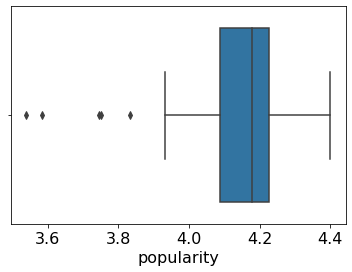

In [139]:
_ = sns.boxplot(df_restaurants.groupby(['zip_code'])['popularity'].mean().reset_index()['popularity'])

In [142]:
weighted_rank_df = df_restaurants.groupby(['zip_code'])['popularity'].mean().reset_index()[['zip_code','popularity']]
popular_threshold = np.percentile(weighted_rank_df['popularity'], 85) #spots with higher weighted ranking
print('Percentile 85: {}'.format(popular_threshold))

Percentile 85: 4.263295012686379


In [168]:
np.percentile(weighted_rank_df['popularity'], 50)

4.178630300860608

The list of 10 best weighted ranking zip codes:

In [141]:
weighted_rank_df.sort_values('popularity', ascending=False).head(10)

,zip_code,popularity
38,33173.0,4.400128
25,33150.0,4.397296
48,33183.0,4.321454
40,33175.0,4.319921
19,33143.0,4.314995
54,33193.0,4.291001
6,33127.0,4.283668
51,33186.0,4.279878
11,33132.0,4.273170
36,33170.0,4.261552


Middle score (between percentile 50 and 85):

In [143]:
weighted_rank_df[(weighted_rank_df['popularity'] > np.percentile(weighted_rank_df['popularity'], 50)) & (weighted_rank_df['popularity'] < np.percentile(weighted_rank_df['popularity'], 85))]

,zip_code,popularity
2,33106.0,4.226640
4,33125.0,4.204562
13,33134.0,4.219692
15,33136.0,4.215835
16,33137.0,4.222481
17,33138.0,4.226699
18,33142.0,4.181754
21,33145.0,4.215159
22,33146.0,4.228486
26,33155.0,4.221081


Popularity by number of reviews:

In [144]:
df_reviews = df_restaurants.groupby(['zip_code'])['review_count'].mean().reset_index()[['zip_code','review_count']]
df_reviews.sort_values('review_count', ascending=False).head(10)

,zip_code,review_count
11,33132.0,774.641026
14,33135.0,666.625954
8,33129.0,541.750000
6,33127.0,495.614865
10,33131.0,493.133758
40,33175.0,490.181818
48,33183.0,480.328358
54,33193.0,463.159091
7,33128.0,459.272727
19,33143.0,427.346154


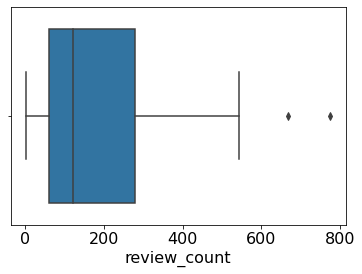

In [146]:
_ = sns.boxplot(df_reviews['review_count'])

### Type of purchases

In [147]:
df_restaurants['purchase'] = df_restaurants['transactions'].apply(indepth_functions.transaction_cleaning)

In [148]:
df_restaurants['pickup_delivery'] = df_restaurants['purchase'].apply(indepth_functions.check_pickup_delivery)

In [149]:
#df_restaurants.to_csv('../data/processed/yelp_MIAMI.csv', index=False)

In [150]:
df_restaurants['pickup_delivery']

0                       NaN
1             only delivery
2       pickup and delivery
3             only delivery
4             only delivery
               ...         
2976          only delivery
2977    pickup and delivery
2978          only delivery
2979          only delivery
2980          only delivery
Name: pickup_delivery, Length: 2981, dtype: object

In [151]:
purchase = df_restaurants.groupby(['zip_code', 'pickup_delivery']).count()
#TO DO: which % is doing what per zipcode, then put attention in more/less popular zipcodes and conclusions

In [152]:
purchase = purchase/purchase.groupby(level=[0]).sum()*100
purchase.rename(columns={'Unnamed: 0': 'ptc'}, inplace=True)
purchase.reset_index(inplace=True)
purchase

,zip_code,pickup_delivery,ids,names,rating,review_count,price,transactions,is_closed,type_food,type_food_alias,latitude,longitude,country,state,city,purchase,popularity
0,33055.0,pickup and delivery,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,33101.0,only pickup,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,33122.0,only delivery,66.666667,66.666667,66.666667,66.666667,68.750000,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667
3,33122.0,only pickup,11.111111,11.111111,11.111111,11.111111,12.500000,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111
4,33122.0,pickup and delivery,22.222222,22.222222,22.222222,22.222222,18.750000,22.222222,22.222222,22.222222,22.222222,22.222222,22.222222,22.222222,22.222222,22.222222,22.222222,22.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,33193.0,only pickup,30.555556,30.555556,30.555556,30.555556,37.931034,30.555556,30.555556,30.555556,30.555556,30.555556,30.555556,30.555556,30.555556,30.555556,30.555556,30.555556
122,33193.0,pickup and delivery,25.000000,25.000000,25.000000,25.000000,24.137931,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
123,33196.0,only pickup,9.523810,9.523810,9.523810,9.523810,10.526316,9.523810,9.523810,9.523810,9.523810,9.523810,9.523810,9.523810,9.523810,9.523810,9.523810,9.523810
124,33196.0,pickup and delivery,90.476190,90.476190,90.476190,90.476190,89.473684,90.476190,90.476190,90.476190,90.476190,90.476190,90.476190,90.476190,90.476190,90.476190,90.476190,90.476190


## Doing pickup and delivery

In [153]:
pickup_delivery_df = purchase[purchase.pickup_delivery == 'pickup and delivery'].sort_values('ids', ascending=False)[['zip_code', 'pickup_delivery', 'ids']]

In [154]:
pickup_delivery_df1 = weighted_rank_df.merge(pickup_delivery_df)
pickup_delivery_df2 = df_reviews.merge(pickup_delivery_df1)

In [166]:
pickup_delivery_df2

,zip_code,review_count,popularity,pickup_delivery,ids
0,33055.0,113.000000,4.084456,pickup and delivery,100.000000
1,33122.0,61.483871,4.170000,pickup and delivery,22.222222
2,33125.0,96.375000,4.204562,pickup and delivery,66.666667
3,33126.0,153.314815,4.150854,pickup and delivery,31.111111
4,33127.0,495.614865,4.283668,pickup and delivery,54.867257
5,33128.0,459.272727,3.749351,pickup and delivery,41.379310
6,33129.0,541.750000,4.052735,pickup and delivery,100.000000
7,33130.0,361.525253,4.157430,pickup and delivery,51.162791
8,33131.0,493.133758,4.102954,pickup and delivery,58.730159
9,33132.0,774.641026,4.273170,pickup and delivery,58.823529


- 33122, 33126 is around the Miami International Airport. This is zone with low foot traffic and low density (0.5k, 5k ppl./sq.mile) thus requires necessarily more delivery services. Check the % of delivery. Around 66% and 55%. it's OK
- 33128 around overtown, east little havana ---> shopping zone, low traffic. Pop: 10k, 30k Benefits from pick-up as well as delivery. Check % of only delivery and only pick-up. More delivery. OK
- 33133 High density 30k-112k. Check if its doing more delivery or pick up. 45% delivery, 10% pick-up. OK
- 33143 South Miami low density zone, requires more delibery --> 86% delivery. OK
- 33146 Westchester low density zone, requires more delibery --> 67% delivery
- 33147 5k-10k, 10k and 30k. 
- 33189 high reviews, low delivery and pick-up, low density (5k-10k majority and some zones with 10k-30k)
- 33193 kendall west 5k-50k more mixed method.

Zip codes and neighborhoods:
- 33133 (**Coconut Grove**, **South Coconut Grove**)
- 33138 (**El Portal**, **Miami Shores**)
- 33165 (**Olympia Heights**)
- 33131 (**Downtown Miami**)
- 33127 (Wynwood, Miami Design District)
- 33135 (West Flager, East Little Havana)
- 33186 (Miami Executive Airport) *******
- 33156 (Pinecrest, Pinecrest Gardens, Botanical Garden, County Preserve) --> potential zone of interest *****
- 33176 (Kendall)
- 33130 (East Little Havana, Downtown)
- 33145 Coral Way
- 33126 close to miami international airport
- 33128 around overtown, east little havana ---> shopping zone
- 33132 Dodge Island, Park Pie, Fisher Island
- 33136 overtown, spring garden
- 33142 allapattah
- 33147 west little river, westgate
- 33155 westchester, ludlam, tropical park
- 33166 (north international airport)
- 33168 (golden glades)
- 33170 (Goulds, sirver palm)
- 33173 (Sunset, (north kendall))
- 33174 florida international university, university park
- 33175 (residential, west of university park and north of kendall west golf park)
- 33183 (Kendale kales, golf park)
- 33184 Tamiami, residential)
- 33193 Kenda West
- 33196 The Hammock, south of Kendall West

## Only pick-up

In [157]:
pickup_df = purchase[purchase.pickup_delivery == 'only pickup'].sort_values('ids', ascending=False)[['zip_code', 'pickup_delivery', 'ids']]

In [158]:
pickup_df1 = weighted_rank_df.merge(pickup_df)
pickup_df2 = df_reviews.merge(pickup_df1)

In [165]:
pickup_df2

,zip_code,review_count,popularity,pickup_delivery,ids
0,33101.0,21.333333,3.961930,only pickup,100.000000
1,33122.0,61.483871,4.170000,only pickup,11.111111
2,33126.0,153.314815,4.150854,only pickup,13.333333
3,33130.0,361.525253,4.157430,only pickup,1.162791
4,33131.0,493.133758,4.102954,only pickup,4.761905
5,33133.0,271.683417,4.137239,only pickup,10.429448
6,33136.0,70.800000,4.215835,only pickup,4.166667
7,33138.0,138.486339,4.226699,only pickup,4.316547
8,33156.0,159.268519,4.223808,only pickup,1.538462
9,33157.0,69.053763,4.175507,only pickup,2.439024


In [127]:
pickup_df[(pickup_df['popularity'] > 34) & (pickup_df['popularity'] < 99)]

,zip_code,popularity,pickup_delivery,ids
2,33126.0,54,only pickup,13.333333
6,33136.0,40,only pickup,4.166667
9,33157.0,93,only pickup,2.439024
11,33168.0,48,only pickup,10.526316
13,33173.0,45,only pickup,2.272727
14,33174.0,67,only pickup,1.666667
15,33175.0,88,only pickup,4.545455
20,33193.0,44,only pickup,30.555556
21,33196.0,51,only pickup,9.523810


## Only delivery

In [160]:
delivery_df = purchase[purchase.pickup_delivery == 'only delivery'].sort_values('ids', ascending=False)[['zip_code', 'pickup_delivery', 'ids']]

In [161]:
delivery_df1 = weighted_rank_df.merge(delivery_df)
delivery_df2 = df_reviews.merge(delivery_df1)

In [167]:
delivery_df2[delivery_df2.ids > 50]

,zip_code,review_count,popularity,pickup_delivery,ids
0,33122.0,61.483871,4.170000,only delivery,66.666667
2,33126.0,153.314815,4.150854,only delivery,55.555556
4,33128.0,459.272727,3.749351,only delivery,58.620690
15,33143.0,427.346154,4.314995,only delivery,85.714286
16,33144.0,105.086957,4.120281,only delivery,73.333333
18,33146.0,87.272727,4.228486,only delivery,66.666667
19,33147.0,18.763158,4.116367,only delivery,58.620690
20,33150.0,89.064516,4.397296,only delivery,55.000000
21,33155.0,163.802469,4.221081,only delivery,60.317460
23,33157.0,69.053763,4.175507,only delivery,60.975610


- 33179 North Miami. Why 100% delivery? the zone have medium density and can get benefits from pick-up, without to be charged for delivery services.
- 33182: it needs delivery. 100% it's OK
- 33255: medium density zone: why 100% delivery
- 

In [169]:
delivery_df2[delivery_df2.ids < 50]

,zip_code,review_count,popularity,pickup_delivery,ids
1,33125.0,96.375000,4.204562,only delivery,33.333333
3,33127.0,495.614865,4.283668,only delivery,45.132743
5,33130.0,361.525253,4.157430,only delivery,47.674419
6,33131.0,493.133758,4.102954,only delivery,32.539683
7,33132.0,774.641026,4.273170,only delivery,41.176471
8,33133.0,271.683417,4.137239,only delivery,45.398773
9,33134.0,45.916667,4.219692,only delivery,22.222222
10,33135.0,666.625954,4.149205,only delivery,27.826087
11,33136.0,70.800000,4.215835,only delivery,41.666667
12,33137.0,296.858696,4.222481,only delivery,28.571429
